<b>Objective</b>

Develop algorithms to classify genetic mutations based on clinical evidence (text)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Training Data

In [3]:
training_variants_df = pd.read_csv('data/training_variants.csv')

In [4]:
training_variants_df.head(5)

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [5]:
training_text_df = pd.read_csv('data/training_text', sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])

In [6]:
training_text_df.head(5)

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [7]:
training_text_df["Text"][0]

"Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK1

In [8]:
training_merge_df = training_variants_df.merge(training_text_df,left_on="ID",right_on="ID")

In [9]:
training_merge_df.head(5)

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


Test Data

In [10]:
testing_variants_df = pd.read_csv("data/test_variants.csv")

In [11]:
testing_variants_df.head(5)

,ID,Gene,Variation
0,0,ACSL4,R570S
1,1,NAGLU,P521L
2,2,PAH,L333F
3,3,ING1,A148D
4,4,TMEM216,G77A


In [12]:
testing_text_df = pd.read_csv("data/test_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])

In [13]:
testing_text_df.head(5)

,ID,Text
0,0,2. This mutation resulted in a myeloproliferat...
1,1,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,Vascular endothelial growth factor receptor (V...
3,3,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,Abstract Retinoblastoma is a pediatric retina...


In [14]:
testing_merge_df = testing_variants_df.merge(testing_text_df,left_on="ID",right_on="ID")

In [15]:
testing_merge_df.head(5)

,ID,Gene,Variation,Text
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...


In [16]:
training_merge_df["Class"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

Describing both Training and Testing data

In [17]:
training_merge_df.describe()

,ID,Class
count,3321.000000,3321.000000
mean,1660.000000,4.365854
std,958.834449,2.309781
min,0.000000,1.000000
25%,830.000000,2.000000
50%,1660.000000,4.000000
75%,2490.000000,7.000000
max,3320.000000,9.000000


In [79]:
testing_merge_df.describe()

,ID
count,5668.000000
mean,2833.500000
std,1636.354994
min,0.000000
25%,1416.750000
50%,2833.500000
75%,4250.250000
max,5667.000000


Check for missing values in both training and testing data columns

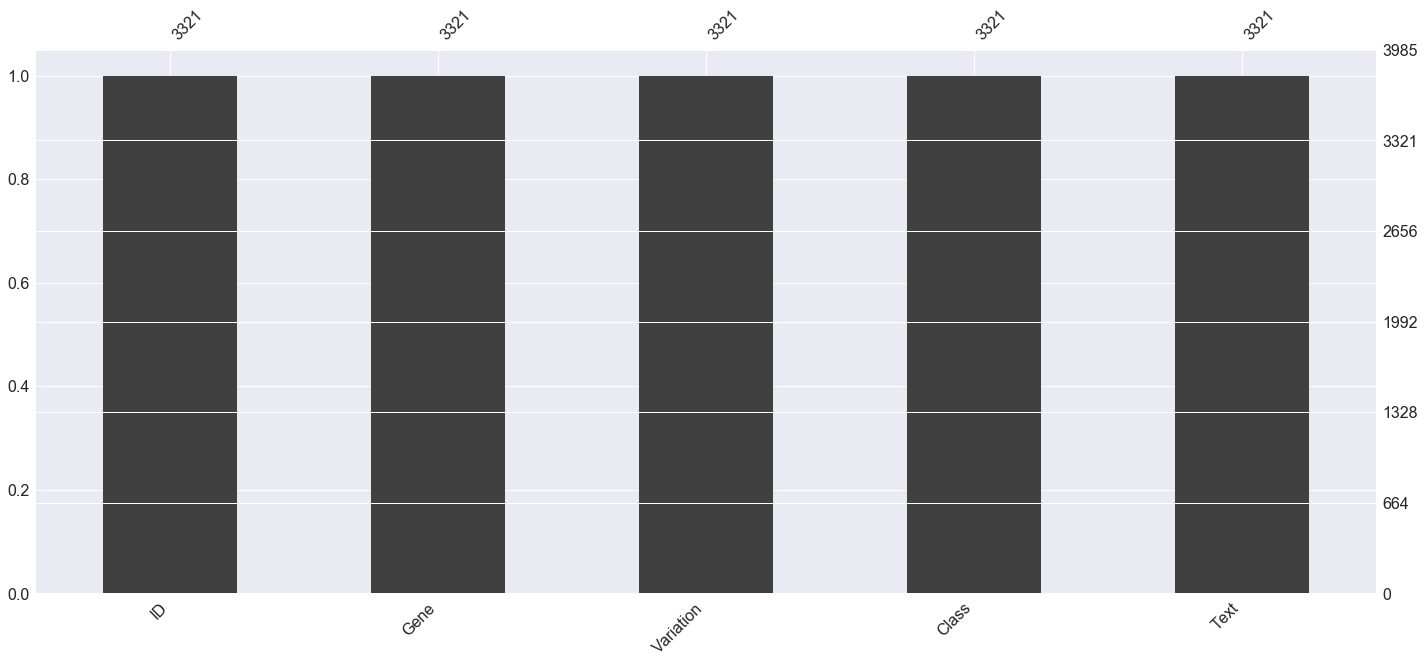

In [18]:
import missingno as msno
msno.bar(training_merge_df)

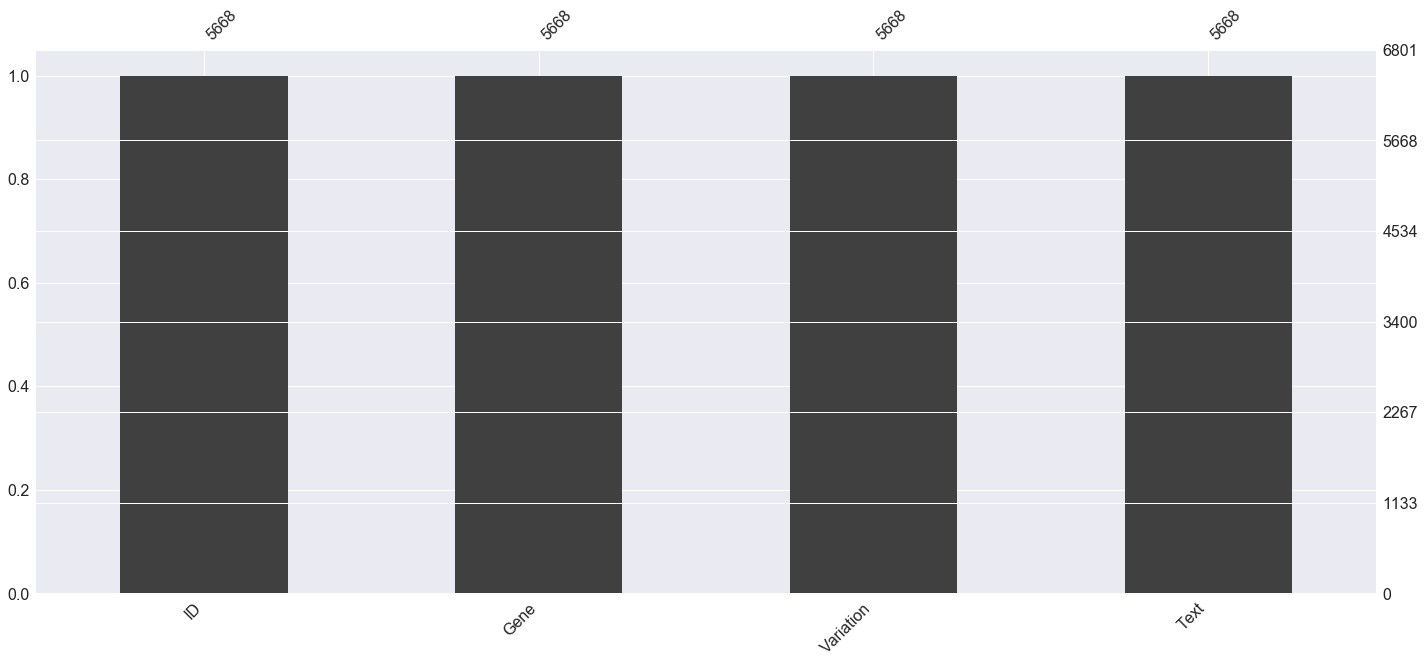

In [19]:
msno.bar(testing_merge_df)

Split the training data to train and test for checking the model accuracy

In [20]:
from sklearn.model_selection import train_test_split

train ,test = train_test_split(training_merge_df,test_size=0.2) 
np.random.seed(0)
train

,ID,Gene,Variation,Class,Text
2971,2971,KIT,P577_D579del,2,To analyze a multi-institutional series of typ...
1839,1839,SETD2,Deletion,4,Histone methyltransferases (HMTs) are importan...
2058,2058,MYC,Amplification,7,A powerful way to discover key genes playing c...
610,610,CDK4,R24C,7,Many human tumors harbor mutations that result...
2115,2115,GATA3,Amplification,2,Almost all neuroblastoma tumors express excess...
1341,1341,AKT1,L321A,7,The protein kinase v-akt murine thymoma viral ...
3046,3046,KIT,Y570H,2,"Context Some melanomas arising from acral, mu..."
2211,2211,PTEN,A126D,4,The PTEN (phosphatase and tensin homolog) phos...
412,412,TP53,DNA binding domain deletions,4,Mutations in the p53 tumor suppressor are the ...
2170,2170,PTEN,S227F,4,The tumor suppressor gene PTEN is frequently m...


Y Training and Y Test Data Counts

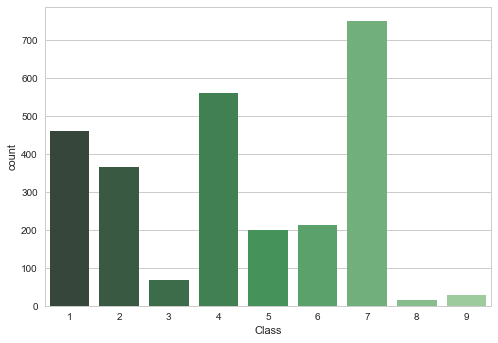

In [62]:
import seaborn as sb
sb.set(style="whitegrid", color_codes=True)
sb.countplot(x="Class",data=train,palette="Greens_d")

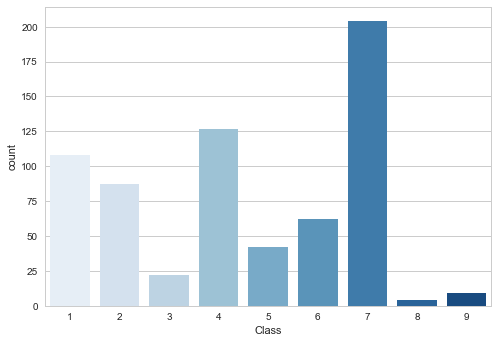

In [68]:
sb.countplot(x="Class",data=test,palette="Blues")

In [63]:
X_train = train['Text'].values
X_test = test['Text'].values
y_train = train['Class'].values
y_test = test['Class'].values

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm

Set pipeline to build a complete text processing model with Vectorizer, Transformer and LinearSVC

In [70]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', svm.LinearSVC())
])
text_clf = text_clf.fit(X_train,y_train)

Getting 60% accuracy with only LinearSVC. Try different ensemble models to get more accurate model.

In [71]:
y_test_predicted = text_clf.predict(X_test)
np.mean(y_test_predicted == y_test)

0.59548872180451129

Predicting values for test data

In [72]:
X_test_final = testing_merge_df['Text'].values

In [73]:
predicted_class = text_clf.predict(X_test_final)

In [74]:
testing_merge_df['predicted_class'] = predicted_class

Appended the predicted values to the testing data

In [75]:
testing_merge_df.head(5)

,ID,Gene,Variation,Text,predicted_class
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...,7
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...,4
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...,4
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...,7
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...,4


Onehot encoding to get the predicted values as columns

In [76]:
onehot = pd.get_dummies(testing_merge_df['predicted_class'])
testing_merge_df = testing_merge_df.join(onehot)

In [77]:
testing_merge_df.head(5)

,ID,Gene,Variation,Text,predicted_class,1,2,3,4,5,6,7,8,9
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...,7,0,0,0,0,0,0,1,0,0
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...,4,0,0,0,1,0,0,0,0,0
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...,4,0,0,0,1,0,0,0,0,0
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...,7,0,0,0,0,0,0,1,0,0
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...,4,0,0,0,1,0,0,0,0,0


Preparing Predictive Results data

In [78]:
predictive_results_df = testing_merge_df[["ID",1,2,3,4,5,6,7,8,9]]
predictive_results_df.columns = ['ID', 'class1','class2','class3','class4','class5','class6','class7','class8','class9']
predictive_results_df.head(5)

,ID,class1,class2,class3,class4,class5,class6,class7,class8,class9
0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0
2,2,0,0,0,1,0,0,0,0,0
3,3,0,0,0,0,0,0,1,0,0
4,4,0,0,0,1,0,0,0,0,0


In [79]:
predictive_results_df.to_csv('data/predictiveresults.csv', index=False)